# CLassifier

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

Using CNTK backend


In [135]:
feature_arrays, label_arrays = np.load('feature_semaforos.npy'), np.load('label_semaforos.npy')

In [136]:
for i , value in enumerate(label_arrays):
    if value == 'green':
        label_arrays[i] = 1
    elif value =='black':
        label_arrays[i] = 0
    elif value == 'red':
        label_arrays[i] = 2
    else:
        print('nothing to do')

In [137]:
X = feature_arrays
y = label_arrays

# Del total train dataset que tenemos, separamos 20% para el validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=35)

In [138]:
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=35)

In [8]:
class PlotLearning(keras.callbacks.Callback):
    """
    Objeto que sirve para plotear las curvas de aprendisaje uutilzando
    la information de loss y accu de un modelo de Keras.
    """
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(15, 10))

        clear_output(wait=True)
        
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="Train loss")
        ax1.plot(self.x, self.val_losses, label="Validation loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="Train accuracy")
        ax2.plot(self.x, self.val_acc, label="Validation accuracy")
        ax2.legend()
        
        plt.show();
        
plot = PlotLearning()

In [18]:
batch_size = 32
num_classes = 3
n_features = X_train.shape[1]

epochs = 500

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_val /= 255
print(X_train.shape[0], 'train samples')
print(X_val.shape[0], 'val samples')
print('Number of features, ', n_features)



1440 train samples
180 val samples
Number of features,  576


In [19]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_val.shape

(180, 3)

In [20]:
y_test = keras.utils.to_categorical(y_test, num_classes)


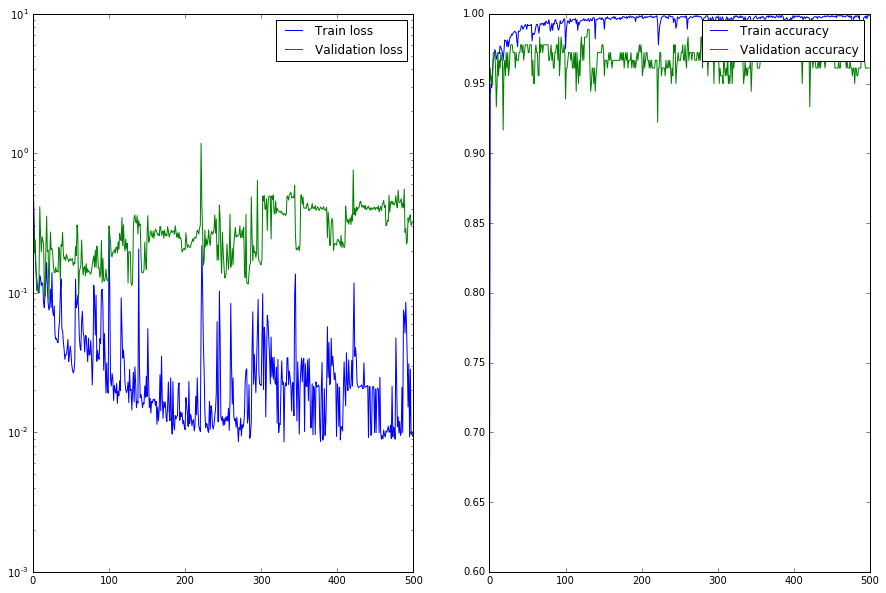

1440/1440 [==============================] - 1s 697us/step - loss: 0.0094 - acc: 0.9986 - val_loss: 0.3238 - val_acc: 0.9611


In [53]:
# MAKE MODEL

model = Sequential()
model.add(Dense(units=512, activation='relu', input_dim = n_features))
model.add(Dropout(0.35))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',#RMSprop(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=5,
                    validation_data=(X_val, y_val),
                    callbacks=[plot])

In [56]:
score = model.evaluate(X_test, y_test, verbose=0)

#model.save('semaphoro_model.h5')

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.446121298886
Test accuracy: 0.972375690608


# TEST MODEL

In [57]:
def preprocess_input(x):
    x = x / 255
    x = x.reshape((1,576))
    return x

In [91]:
def get_cat(prediction):
    values = {1 : 'green', 2 :'red', 0:'black'}
    position = np.amax(prediction.argmax(axis=1))
    cls = values[position]
    return cls

[[ 0.  1.  0.]]
green


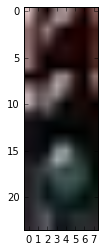

In [92]:
from matplotlib.pyplot import imshow

import numpy as np
from keras.models import load_model
from keras.preprocessing import image

img_path = './1.png'
img = image.load_img(img_path, target_size=(24, 8))
imshow(img)

#model = load_model('semaphoro_model20epochs.h5')

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
prediction1 = model.predict(x)
print(prediction1)
print(get_cat(prediction1))


[[ 0.  1.  0.]]
green


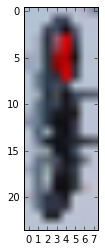

In [93]:
img_path = './3.jpg'
img = image.load_img(img_path, target_size=(24, 8))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
prediction2 = model.predict(x)
print(prediction2)
print(get_cat(prediction2))

[[ 0.  0.  1.]]
red


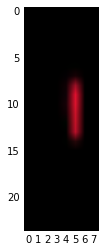

In [94]:
img_path = './6.jpg'
img = image.load_img(img_path, target_size=(24, 8))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
prediction3 = model.predict(x)
print(prediction3)
print(get_cat(prediction3))

green


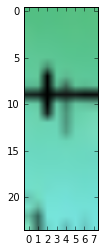

In [95]:
img_path = './4.jpg'
img = image.load_img(img_path, target_size=(24, 8))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
p4 = model.predict(x)
print(get_cat(p4))

# WORKING WITH CNTK FEEDFORDWARD CLASSIFICATION

In [2]:
from __future__ import print_function # Use a function definition from future version (say 3.x from 2.7 interpreter)
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

import cntk as C
import cntk.tests.test_utils
cntk.tests.test_utils.set_device_from_pytest_env() # (only needed for our build system)
C.cntk_py.set_fixed_random_seed(1) # fix a random seed for CNTK components

%matplotlib inline

In [38]:
# Import the relevant modules to be used later
import gzip
import os
import shutil
import struct
import sys

try: 
    from urllib.request import urlretrieve 
except ImportError: 
    from urllib import urlretrieve



In [77]:
# Functions to load MNIST images and unpack into train and test set.
# - loadData reads a image and formats it into a 28x28 long array
# - loadLabels reads the corresponding label data, one for each image
# - load packs the downloaded image and label data into a combined format to be read later by 
#   the CNTK text reader 

def loadData(src, cimg):
    print ('Downloading ' + src)
    gzfname, h = urlretrieve(src, './delete.me')
    print ('Done.')
    try:
        with gzip.open(gzfname) as gz:
            n = struct.unpack('I', gz.read(4))
            # Read magic number.
            if n[0] != 0x3080000:
                raise Exception('Invalid file: unexpected magic number.')
            # Read number of entries.
            n = struct.unpack('>I', gz.read(4))[0]
            if n != cimg:
                raise Exception('Invalid file: expected {0} entries.'.format(cimg))
            crow = struct.unpack('>I', gz.read(4))[0]
            ccol = struct.unpack('>I', gz.read(4))[0]
            if crow != 28 or ccol != 28:
                raise Exception('Invalid file: expected 28 rows/cols per image.')
            # Read data.
            res = np.fromstring(gz.read(cimg * crow * ccol), dtype = np.uint8)
    finally:
        os.remove(gzfname)
    return res.reshape((cimg, crow * ccol))

def loadLabels(src, cimg):
    print ('Downloading ' + src)
    gzfname, h = urlretrieve(src, './delete.me')
    print ('Done.')
    try:
        with gzip.open(gzfname) as gz:
            n = struct.unpack('I', gz.read(4))
            # Read magic number.
            if n[0] != 0x1080000:
                raise Exception('Invalid file: unexpected magic number.')
            # Read number of entries.
            n = struct.unpack('>I', gz.read(4))
            if n[0] != cimg:
                raise Exception('Invalid file: expected {0} rows.'.format(cimg))
            # Read labels.
            res = np.fromstring(gz.read(cimg), dtype = np.uint8)
    finally:
        os.remove(gzfname)
    return res.reshape((cimg, 1))

def try_download(dataSrc, labelsSrc, cimg):
    data = loadData(dataSrc, cimg)
    print('data shape', data.shape)
    labels = loadLabels(labelsSrc, cimg)
    print('labels.shape', labels.shape)
    return np.hstack((data, labels))


In [78]:
# URLs for the train image and label data
url_train_image = 'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz'
url_train_labels = 'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz'
num_train_samples = 60000

print("Downloading train data")
train = try_download(url_train_image, url_train_labels, num_train_samples)

# URLs for the test image and label data
url_test_image = 'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz'
url_test_labels = 'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz'
num_test_samples = 10000

print("Downloading test data")
test = try_download(url_test_image, url_test_labels, num_test_samples)

Done.
data shape (60000, 784)
Done.
labels.shape (60000, 1)
Done.
data shape (10000, 784)
Done.
labels.shape (10000, 1)


Image Label:  3


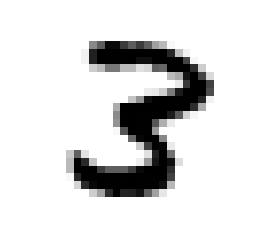

In [66]:
# Plot a random image
sample_number = 5001-5
plt.imshow(train[sample_number,:-1].reshape(28,28), cmap="gray_r")
plt.axis('off')
print("Image Label: ", train[sample_number,-1])

In [ ]:
# Reshape Y to (n_examplex, 1)

In [140]:
y_train = y_train.reshape((y_train.shape[0],1))
y_val = y_val.reshape((y_val.shape[0],1))
y_test = y_test.reshape((y_test.shape[0],1))

hstacking all in a unique data

In [142]:
train = np.hstack((X_train, y_train))
train = train.astype(np.uint8)

test = np.hstack((X_test, y_test))
test = test.astype(np.uint8)


val = np.hstack((X_val, y_val))
val = val.astype(np.uint8)


In [144]:
print('size of train', train.shape)
print('size of test', test.shape)
print('size of val', val.shape)

size of train (1440, 577)
size of test (181, 577)
size of val (180, 577)


Image Label:  1


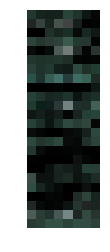

In [148]:
# Plot a random image
sample_number = 200
plt.imshow(train[sample_number,:-1].reshape(24,8,3), cmap="gray_r")
plt.axis('off')
print("Image Label: ", train[sample_number,-1])

In [177]:
# Save the data files into a format compatible with CNTK text reader
def savetxt(filename, ndarray):
    dir = os.path.dirname(filename)

    if not os.path.exists(dir):
        os.makedirs(dir)

    if not os.path.isfile(filename):
        print("Saving", filename )
        with open(filename, 'w') as f:
            labels = list(map(' '.join, np.eye(3, dtype=np.uint).astype(str)))
            for row in ndarray:
                row_str = row.astype(str)
                label_str = labels[row[-1]]
                feature_str = ' '.join(row_str[:-1])
                f.write('|labels {} |features {}\n'.format(label_str, feature_str))
    else:
        print("File already exists", filename)


In [178]:
# Save the train and test files (prefer our default path for the data)
data_dir = os.path.join("..", "Examples", "Image", "DataSets", "Semaphoro")
if not os.path.exists(data_dir):
    data_dir = os.path.join("data", "Semaphoro")

print ('Writing train text file...')
savetxt(os.path.join(data_dir, "Train-24x8x3_cntk_text.txt"), train)

print ('Writing test text file...')
savetxt(os.path.join(data_dir, "Test-24x8x3_cntk_text.txt"), test)

print ('Writing test text file...')
savetxt(os.path.join(data_dir, "Val-24x8x3_cntk_text.txt"), val)

print('Done')

Writing train text file...
File already exists data/Semaphoro/Train-24x8x3_cntk_text.txt
Writing test text file...
File already exists data/Semaphoro/Test-24x8x3_cntk_text.txt
Writing test text file...
File already exists data/Semaphoro/Val-24x8x3_cntk_text.txt
Done


### READ DATA

In [179]:
# Read a CTF formatted text (as mentioned above) using the CTF deserializer from a file
def create_reader(path, is_training, input_dim, num_label_classes):
    return C.io.MinibatchSource(C.io.CTFDeserializer(path, C.io.StreamDefs(
        labels = C.io.StreamDef(field='labels', shape=num_label_classes, is_sparse=False),
        features   = C.io.StreamDef(field='features', shape=input_dim, is_sparse=False)
    )), randomize = is_training, max_sweeps = C.io.INFINITELY_REPEAT if is_training else 1)

In [180]:
# Ensure the training and test data is generated and available for this tutorial.
# We search in two locations in the toolkit for the cached MNIST data set.
data_found = False
for data_dir in [os.path.join("..", "Examples", "Image", "DataSets", "Semaphoro"),
                 os.path.join("data", "Semaphoro")]:
    
    train_file = os.path.join(data_dir, "Train-24x8x3_cntk_text.txt")
    test_file = os.path.join(data_dir, "Test-24x8x3_cntk_text.txt")
    val_file = os.path.join(data_dir, "Val-24x8x3_cntk_text.txt")
    
    if os.path.isfile(train_file) and os.path.isfile(test_file):
        data_found = True
        break
if not data_found:
    raise ValueError("Please generate the data by completing CNTK 103 Part A")
print("Data directory is {0}".format(data_dir))

Data directory is data/Semaphoro


In [181]:
input_dim = n_features
num_output_classes = 3
input_dim

576

In [182]:
num_hidden_layers = 3
hidden_layers_dim = 400

In [183]:
input = C.input_variable(input_dim)
label = C.input_variable(num_output_classes)

### Multi-layer Perceptron setup

In [184]:
def create_model(features):
    with C.layers.default_options(init = C.layers.glorot_uniform(), activation = C.ops.relu):
            h = features
            for _ in range(num_hidden_layers):
                h = C.layers.Dense(hidden_layers_dim)(h)
            r = C.layers.Dense(num_output_classes, activation = None)(h)
            return r
        
z = create_model(input)

In [170]:
# Scale the input to 0-1 range by dividing each pixel by 255.
z = create_model(input/255.0)

### Training

In [171]:
loss = C.cross_entropy_with_softmax(z, label)

### Evaluation

In [172]:
label_error = C.classification_error(z, label)

### Configure training

In [173]:
# Instantiate the trainer object to drive the model training
learning_rate = 0.2
lr_schedule = C.learning_parameter_schedule(learning_rate)
learner = C.sgd(z.parameters, lr_schedule)
trainer = C.Trainer(z, (loss, label_error), [learner])

In [174]:
# Define a utility function to compute the moving average sum.
# A more efficient implementation is possible with np.cumsum() function
def moving_average(a, w=5):
    if len(a) < w:
        return a[:]    # Need to send a copy of the array
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx, val in enumerate(a)]


# Defines a utility that prints the training progress
def print_training_progress(trainer, mb, frequency, verbose=1):
    training_loss = "NA"
    eval_error = "NA"

    if mb%frequency == 0:
        training_loss = trainer.previous_minibatch_loss_average
        eval_error = trainer.previous_minibatch_evaluation_average
        if verbose: 
            print ("Minibatch: {0}, Loss: {1:.4f}, Error: {2:.2f}%".format(mb, training_loss, eval_error*100))
        
    return mb, training_loss, eval_error

### Run the trainer

In [175]:
# Initialize the parameters for the trainer
minibatch_size = 32
num_samples_per_sweep = X.shape[0]
num_sweeps_to_train_with = 10
num_minibatches_to_train = (num_samples_per_sweep * num_sweeps_to_train_with) / minibatch_size

In [185]:
# Create the reader to training data set
reader_train = create_reader(train_file, True, input_dim, num_output_classes)

# Map the data streams to the input and labels.
input_map = {
    label  : reader_train.streams.labels,
    input  : reader_train.streams.features
} 

# Run the trainer on and perform model training
training_progress_output_freq = 500

plotdata = {"batchsize":[], "loss":[], "error":[]}

for i in range(0, int(num_minibatches_to_train)):
    
    # Read a mini batch from the training data file
    data = reader_train.next_minibatch(minibatch_size, input_map = input_map)
    
    trainer.train_minibatch(data)
    batchsize, loss, error = print_training_progress(trainer, i, training_progress_output_freq, verbose=1)
    
    if not (loss == "NA" or error =="NA"):
        plotdata["batchsize"].append(batchsize)
        plotdata["loss"].append(loss)
        plotdata["error"].append(error)

RuntimeError: Reached the maximum number of allowed errors while reading the input file (data/Semaphoro/Train-24x8x3_cntk_text.txt).

[CALL STACK]
[0x7f55637150cc]                                                       + 0x1a0cc
[0x7f5563719820]    CNTK::TextParser<float>::  GetFileOffset  () const + 0
[0x7f5563720950]    CNTK::TextParser<float>::  TryReadSample  (std::vector<std::shared_ptr<CNTK::SequenceDataBase>,std::allocator<std::shared_ptr<CNTK::SequenceDataBase>>>&,  unsigned long&) + 0xb0
[0x7f5563720c46]    CNTK::TextParser<float>::  TryReadRow  (std::vector<std::shared_ptr<CNTK::SequenceDataBase>,std::allocator<std::shared_ptr<CNTK::SequenceDataBase>>>&,  unsigned long&) + 0xf6
[0x7f556372139c]    CNTK::TextParser<float>::  LoadSequence  (CNTK::SequenceDescriptor const&,  unsigned long) + 0x3bc
[0x7f5563721aad]    CNTK::TextParser<float>::  LoadChunk  (std::shared_ptr<CNTK::TextParser<float>::TextDataChunk>&,  CNTK::ChunkDescriptor const&) + 0x9d
[0x7f5563721d7e]    CNTK::TextParser<float>::  GetChunk  (unsigned int) + 0x1ae
[0x7f55a30f6c42]    CNTK::BlockRandomizer::  LoadDataChunks  (CNTK::ClosedOpenChunkInterval const&) + 0x402
[0x7f55a30f7315]    CNTK::BlockRandomizer::  LoadSequenceData  (unsigned long,  unsigned long,  CNTK::Sequences&,  bool) + 0xe5
[0x7f55a30f7b77]    CNTK::BlockRandomizer::  GetNextSequences  (unsigned long,  unsigned long) + 0x97
[0x7f55a311efec]    CNTK::SequencePacker::  ReadMinibatch  ()          + 0x3c
[0x7f55a312ee5e]    CNTK::ReaderBase::  ReadMinibatch  ()              + 0xe
[0x7f55a3118f31]    CNTK::ReaderShim<float>::  PrefetchMinibatch  (unsigned long) + 0xe1
[0x7f55a3119533]    std::_Function_handler<CNTK::ReaderShim<float>::PrefetchResult (),std::reference_wrapper<std::_Bind_simple<CNTK::ReaderShim<float>::StartAsyncPrefetching()::{lambda()#1} ()>>>::  _M_invoke  (std::_Any_data const&) + 0x13
[0x7f55a310f39e]    std::_Function_handler<std::unique_ptr<std::__future_base::_Result_base,std::__future_base::_Result_base::_Deleter> (),std::__future_base::_Task_setter<std::unique_ptr<std::__future_base::_Result<CNTK::ReaderShim<float>::PrefetchResult>,std::__future_base::_Result_base::_Deleter>,CNTK::ReaderShim<float>::PrefetchResult>>::  _M_invoke  (std::_Any_data const&) + 0x1e
[0x7f55a30f808e]    std::__future_base::_State_base::  _M_do_set  (std::function<std::unique_ptr<std::__future_base::_Result_base,std::__future_base::_Result_base::_Deleter> ()>&,  bool&) + 0x1e
[0x7f55dc501a99]                                                       + 0xea99
[0x7f55a31164e8]    std::thread::_Impl<std::_Bind_simple<std::__future_base::_Async_state_impl<std::_Bind_simple<CNTK::ReaderShim<float>::StartAsyncPrefetching()::{lambda()#1} ()>,CNTK::ReaderShim<float>::PrefetchResult>::_Async_state_impl(CNTK::ReaderShim<float>::StartAsyncPrefetching()::{lambda()#1} (&&)())::{lambda()#1} ()>>::  _M_run  () + 0xe8
[0x7f55d77f3c80]                                                       + 0xb8c80
[0x7f55dc4fa6ba]                                                       + 0x76ba
[0x7f55dc22a3dd]    clone                                              + 0x6d


# KERAS TO CNTK

In [121]:
# KERAS TO CNTK
import cntk

keras_model = load_model('semaphoro_model20epochs.h5')

cntk.combine(keras_model.model.outputs).save('my_semaphoro_cntk_model.cntk')

cntk_model = cntk.load_model('my_semaphoro_cntk_model.dnn')

print('model loadded', type(cntk_model))


model loadded <class 'cntk.ops.functions.Function'>


In [122]:
loaded_model = cntk.load_model('my_semaphoro_cntk_model.cntk')

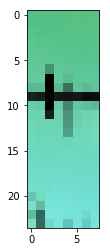

In [8]:
from cntk.ops.functions import load_model

z = load_model("my_semaphoro_cntk_model.cntk")

img_path = './4.jpg'
img = image.load_img(img_path, target_size=(24, 8))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

predictions = np.squeeze(z.eval({z.arguments[0]:[x]}))
top_class = np.argmax(predictions)

In [9]:
print(predictions)

[ 0.  1.  0.]


In [10]:
print(top_class)

1
